In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error, accuracy_score, r2_score, mean_absolute_error
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('Data/IMDB/movie_metadata.csv')
data.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


# Data Exploration

In [3]:
data.shape

(5043, 28)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      5024 non-null   object 
 1   director_name              4939 non-null   object 
 2   num_critic_for_reviews     4993 non-null   float64
 3   duration                   5028 non-null   float64
 4   director_facebook_likes    4939 non-null   float64
 5   actor_3_facebook_likes     5020 non-null   float64
 6   actor_2_name               5030 non-null   object 
 7   actor_1_facebook_likes     5036 non-null   float64
 8   gross                      4159 non-null   float64
 9   genres                     5043 non-null   object 
 10  actor_1_name               5036 non-null   object 
 11  movie_title                5043 non-null   object 
 12  num_voted_users            5043 non-null   int64  
 13  cast_total_facebook_likes  5043 non-null   int64

In [5]:
data.isnull().sum()

color                         19
director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews          21
language                      12
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
dtype: int64

In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
num_critic_for_reviews,4993.0,1.401943e+02,1.216017e+02,1.00,50.00,110.00,195.00,8.130000e+02
duration,5028.0,1.072011e+02,2.519744e+01,7.00,93.00,103.00,118.00,5.110000e+02
director_facebook_likes,4939.0,6.865092e+02,2.813329e+03,0.00,7.00,49.00,194.50,2.300000e+04
actor_3_facebook_likes,5020.0,6.450098e+02,1.665042e+03,0.00,133.00,371.50,636.00,2.300000e+04
actor_1_facebook_likes,5036.0,6.560047e+03,1.502076e+04,0.00,614.00,988.00,11000.00,6.400000e+05
gross,4159.0,4.846841e+07,6.845299e+07,162.00,5340987.50,25517500.00,62309437.50,7.605058e+08
num_voted_users,5043.0,8.366816e+04,1.384853e+05,5.00,8593.50,34359.00,96309.00,1.689764e+06
cast_total_facebook_likes,5043.0,9.699064e+03,1.816380e+04,0.00,1411.00,3090.00,13756.50,6.567300e+05
facenumber_in_poster,5030.0,1.371173e+00,2.013576e+00,0.00,0.00,1.00,2.00,4.300000e+01
num_user_for_reviews,5022.0,2.727708e+02,3.779829e+02,1.00,65.00,156.00,326.00,5.060000e+03


In [7]:
data.nunique()

color                           2
director_name                2398
num_critic_for_reviews        528
duration                      191
director_facebook_likes       435
actor_3_facebook_likes        906
actor_2_name                 3032
actor_1_facebook_likes        878
gross                        4035
genres                        914
actor_1_name                 2097
movie_title                  4917
num_voted_users              4826
cast_total_facebook_likes    3978
actor_3_name                 3521
facenumber_in_poster           19
plot_keywords                4760
movie_imdb_link              4919
num_user_for_reviews          954
language                       47
country                        65
content_rating                 18
budget                        439
title_year                     91
actor_2_facebook_likes        917
imdb_score                     78
aspect_ratio                   22
movie_facebook_likes          876
dtype: int64

In [8]:
data['color'].value_counts()

Color               4815
 Black and White     209
Name: color, dtype: int64

In [9]:
data['language'].value_counts()

English       4704
French          73
Spanish         40
Hindi           28
Mandarin        26
German          19
Japanese        18
Italian         11
Russian         11
Cantonese       11
Korean           8
Portuguese       8
Arabic           5
Swedish          5
Hebrew           5
Danish           5
Norwegian        4
Dutch            4
Polish           4
Persian          4
Thai             3
Chinese          3
Dari             2
None             2
Indonesian       2
Zulu             2
Aboriginal       2
Romanian         2
Icelandic        2
Tamil            1
Mongolian        1
Dzongkha         1
Greek            1
Kazakh           1
Slovenian        1
Kannada          1
Czech            1
Aramaic          1
Urdu             1
Vietnamese       1
Telugu           1
Bosnian          1
Filipino         1
Swahili          1
Panjabi          1
Maya             1
Hungarian        1
Name: language, dtype: int64

In [10]:
data['movie_title']

0                                                 Avatar 
1               Pirates of the Caribbean: At World's End 
2                                                Spectre 
3                                  The Dark Knight Rises 
4       Star Wars: Episode VII - The Force Awakens    ...
                              ...                        
5038                             Signed Sealed Delivered 
5039                           The Following             
5040                                A Plague So Pleasant 
5041                                    Shanghai Calling 
5042                                   My Date with Drew 
Name: movie_title, Length: 5043, dtype: object

In [11]:
data.movie_title[data.language == 'Hindi']

1056                                 Earth 
3075                Kabhi Alvida Naa Kehna 
3085                             Housefull 
3208                                Krrish 
3276                      Jab Tak Hai Jaan 
3344                       My Name Is Khan 
3348                       Namastey London 
3350               Yeh Jawaani Hai Deewani 
3455                         Ta Ra Rum Pum 
3510                            Veer-Zaara 
3665                           Khiladi 786 
3685                       Rang De Basanti 
3695                         Dum Maaro Dum 
3789                     Gandhi, My Father 
3866                                 Fugly 
3870                               Airlift 
3877                                   Paa 
4088                                 Water 
4160                  Lage Raho Munna Bhai 
4299                Hum To Mohabbat Karega 
4305                        Roadside Romeo 
4351             ABCD (Any Body Can Dance) 
4385                          Th

In [12]:
# Saving the Hindi movies into a separate dataframe
hm = data[data.language == 'Hindi']
hm.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
1056,Color,Deepa Mehta,34.0,110.0,375.0,59.0,Gulshan Grover,113.0,528972.0,Drama|Romance|War,...,55.0,Hindi,India,Unrated,NaN,1998.0,102.0,7.8,NaN,522
3075,Color,Karan Johar,20.0,193.0,160.0,860.0,John Abraham,8000.0,3275443.0,Drama,...,264.0,Hindi,India,R,700000000.0,2006.0,1000.0,6.0,2.35,659
3085,Color,Sajid Khan,10.0,144.0,0.0,119.0,Boman Irani,564.0,1165104.0,Comedy,...,43.0,Hindi,India,NaN,NaN,2010.0,154.0,5.3,NaN,250
3208,Color,Rakesh Roshan,20.0,168.0,53.0,45.0,Rekha,307.0,NaN,Action|Adventure|Romance|Sci-Fi,...,110.0,Hindi,India,Not Rated,10000000.0,2006.0,200.0,6.3,2.35,533
3276,Color,Yash Chopra,50.0,176.0,147.0,1000.0,Katrina Kaif,8000.0,3047539.0,Drama|Romance,...,286.0,Hindi,India,Not Rated,7217600.0,2012.0,3000.0,6.9,2.35,12000


In [13]:
# storing movies with imdb score equal to 7 or above 7 
scores = hm.imdb_score[hm.imdb_score>=7]
name = hm.movie_title[hm.imdb_score>=7]
genre = hm.genres[hm.imdb_score>=7]

In [14]:
# creating a dataframe
bollywoodmovies = pd.concat([name,genre,scores],axis=1)
bollywoodmovies.head()

,movie_title,genres,imdb_score
1056,Earth,Drama|Romance|War,7.8
3344,My Name Is Khan,Adventure|Drama|Thriller,8.0
3348,Namastey London,Comedy|Drama|Romance,7.3
3510,Veer-Zaara,Drama|Musical|Romance,7.9
3685,Rang De Basanti,Comedy|Drama|History|Romance,8.4


## EDA

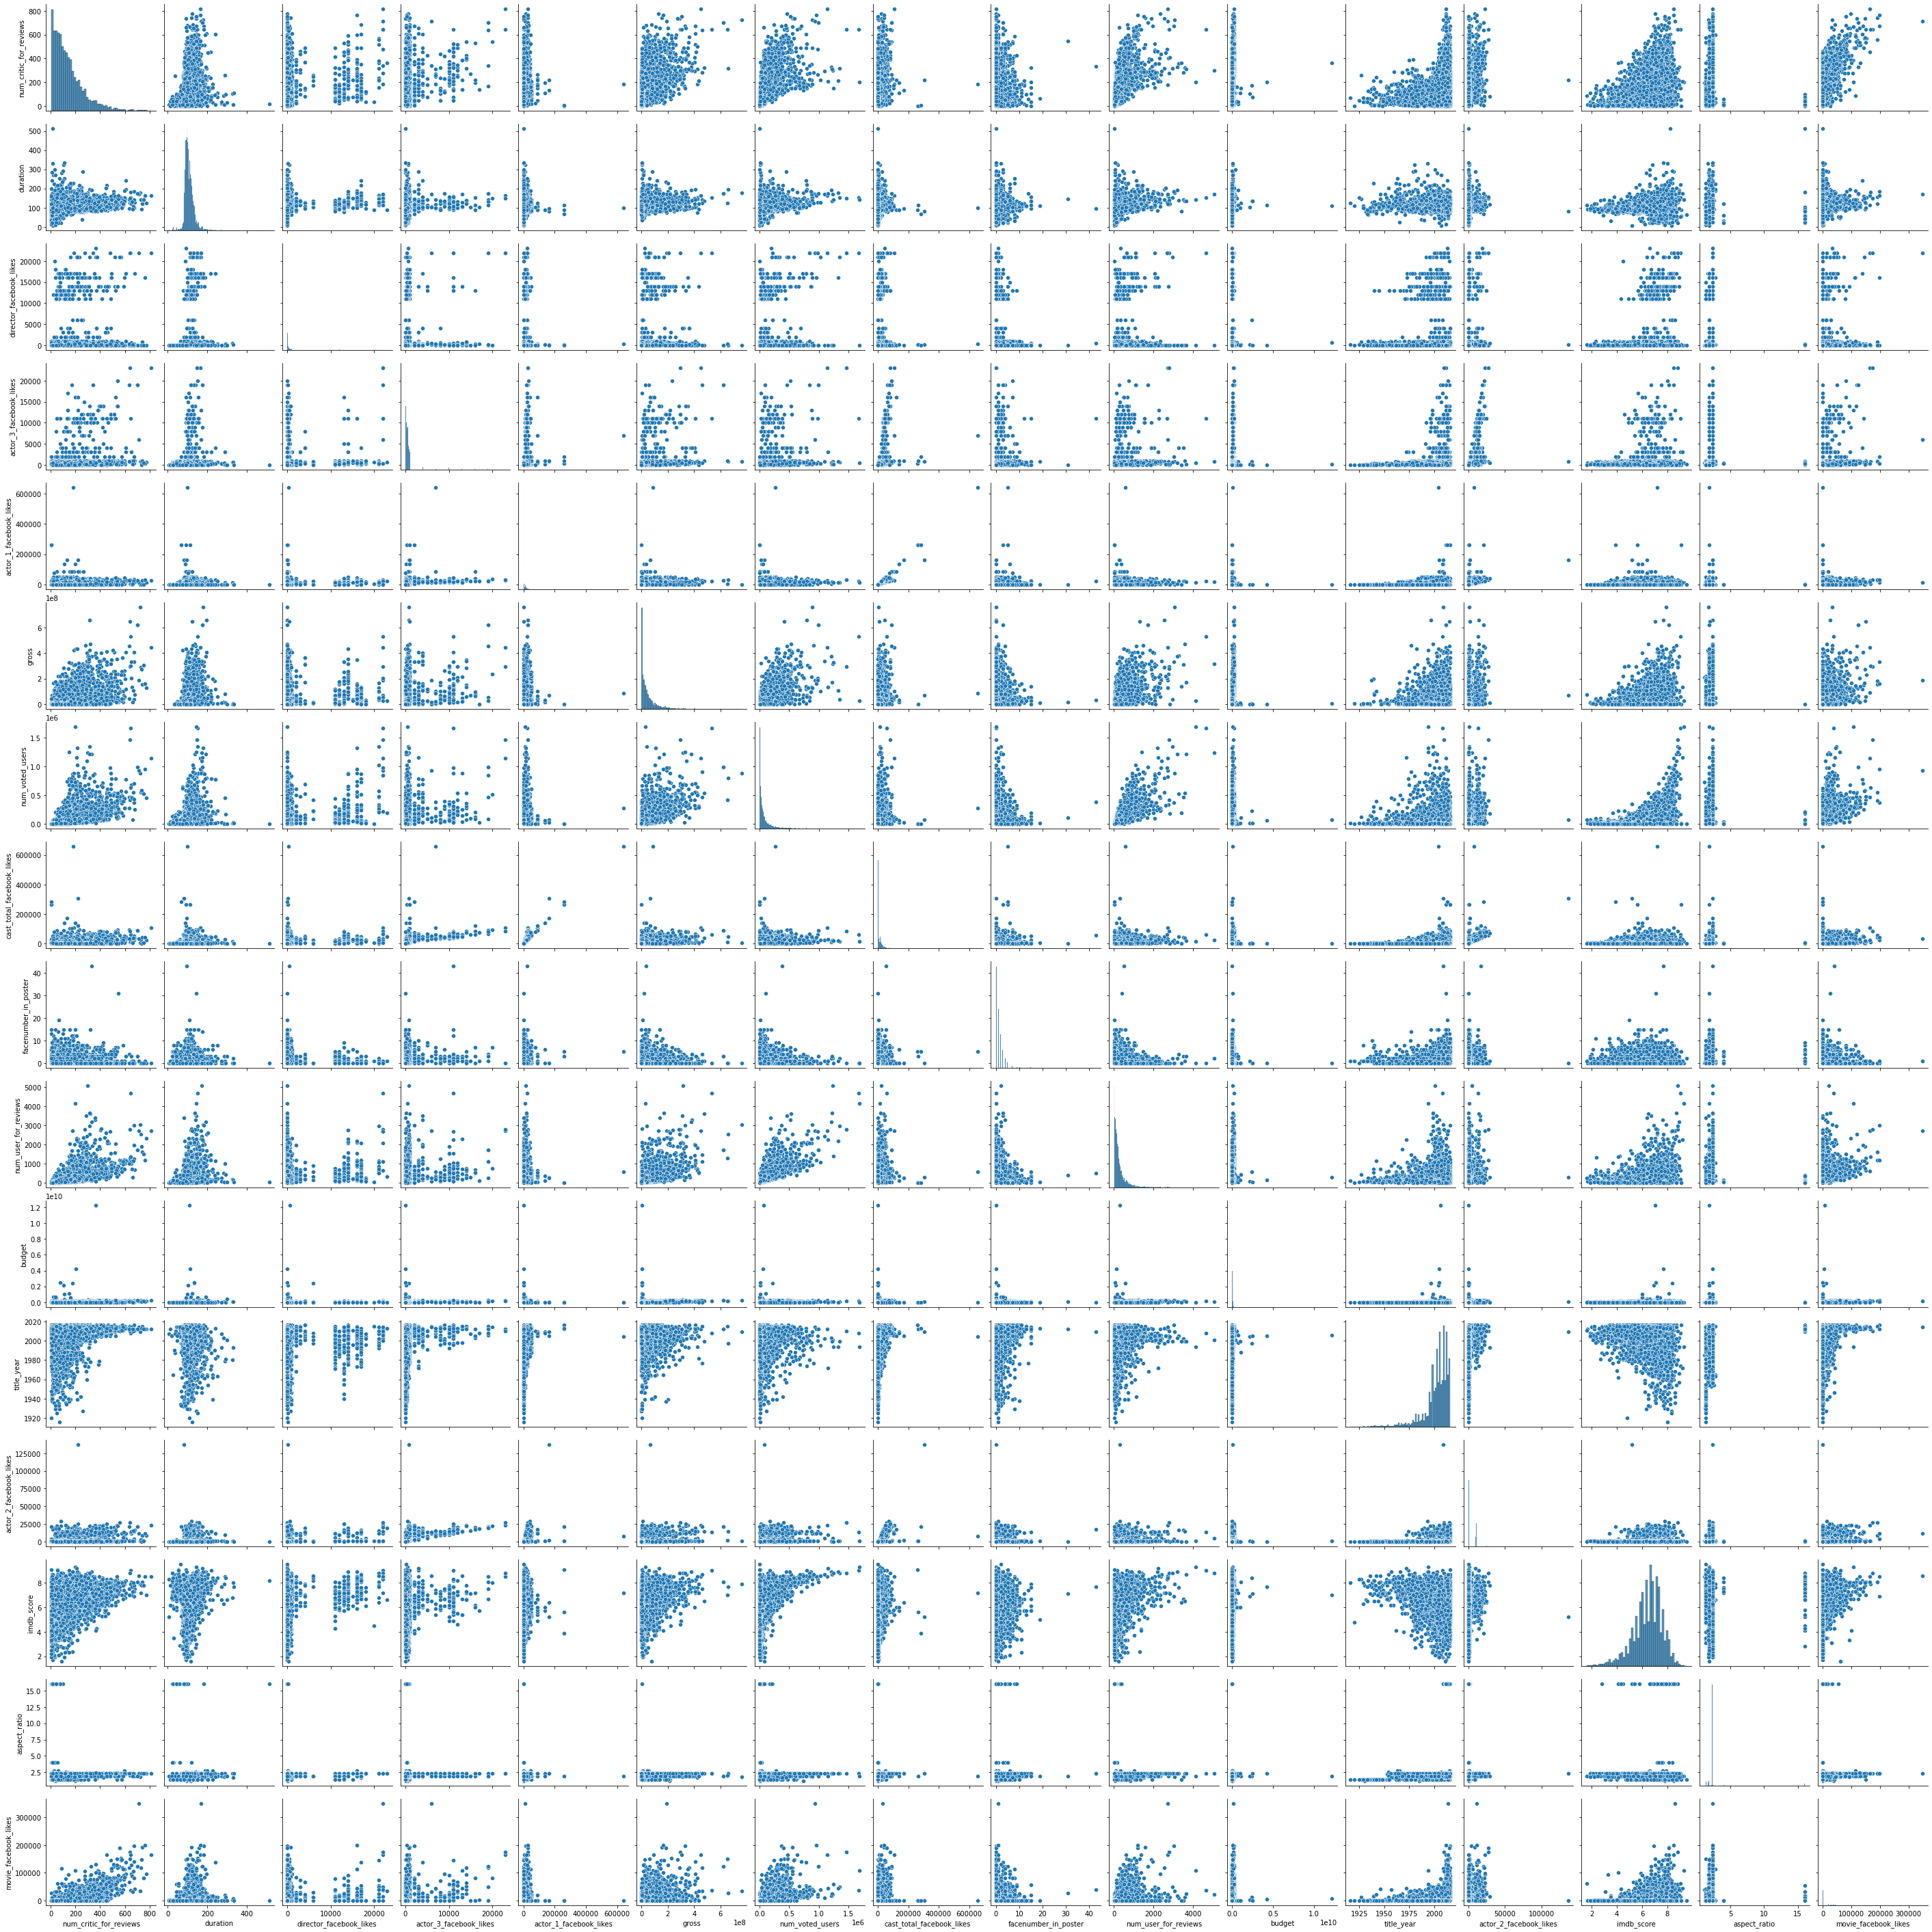

In [15]:
sns.pairplot(data=data);
plt.show()

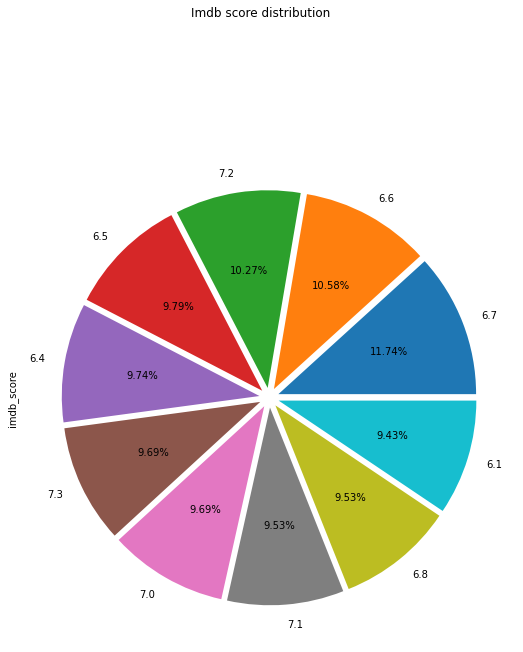

In [16]:
# Pie plot for top 10 Imdb_scores.
f,ax=plt.subplots(figsize=(10,20)) 
ax1=plt.subplot(211)
f.suptitle("Imdb score distribution")
explode=(0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05)
data['imdb_score'].value_counts(ascending=False).head(10).plot(kind = 'pie',autopct="%0.2f%%",explode=explode,ax=ax1)
plt.show()

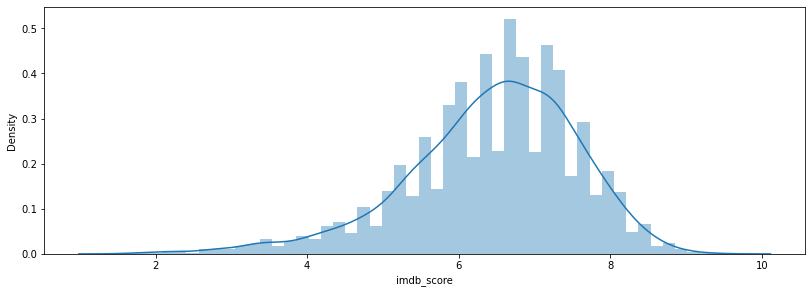

In [17]:
# Distribution plot for all prices.
f,ax=plt.subplots(figsize=(30,10))
ax3=plt.subplot(224)
sns.distplot(data['imdb_score'],ax=ax3)
plt.show()

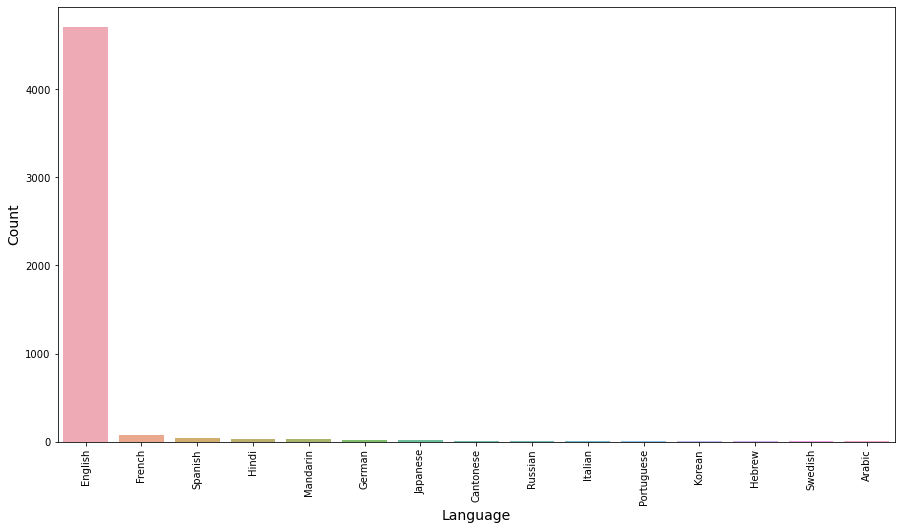

In [18]:
ls=data['language'].value_counts().head(15).sort_values(ascending=False)
plt.figure(figsize=(15,8))
temp =sns.barplot(ls.index, ls.values, alpha=0.8)
plt.ylabel('Count', fontsize=14)
plt.xlabel('Language', fontsize=14)
temp.set_xticklabels(rotation=90,labels=ls.index,fontsize=10)
plt.show()

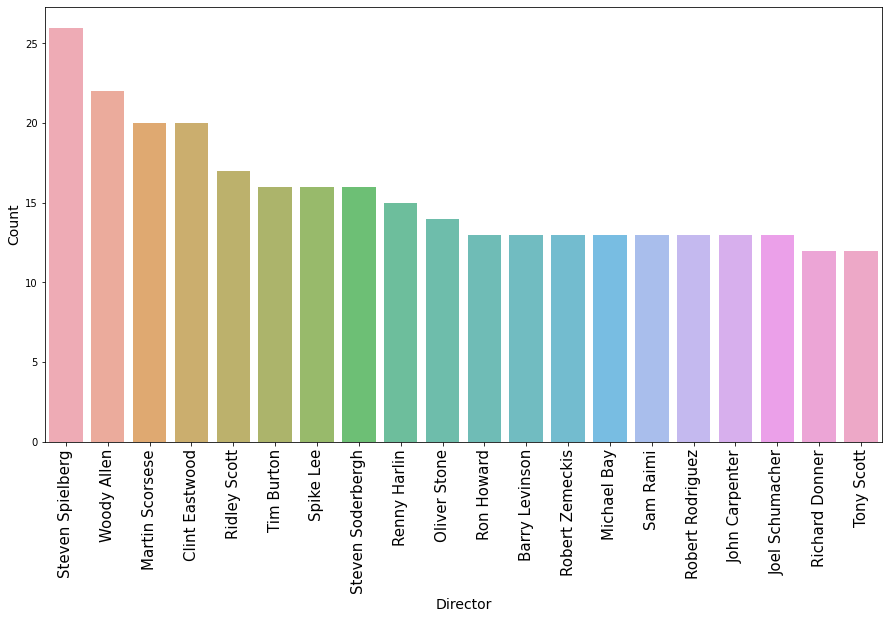

In [19]:
ls=data['director_name'].value_counts().head(20).sort_values(ascending=False)
plt.figure(figsize=(15,8))
temp =sns.barplot(ls.index, ls.values, alpha=0.8)
plt.ylabel('Count', fontsize=14)
plt.xlabel('Director', fontsize=14)
temp.set_xticklabels(rotation=90,labels=ls.index,fontsize=15)
plt.show()

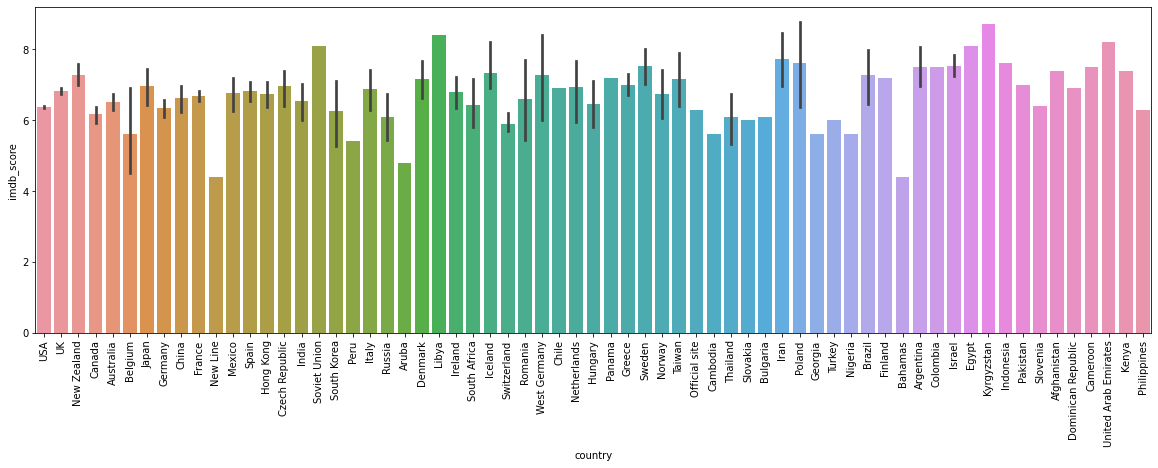

In [20]:
plt.figure(figsize=(20, 6))
sns.barplot(x='country',y='imdb_score',data=data);
plt.xticks(rotation=90)
plt.show()

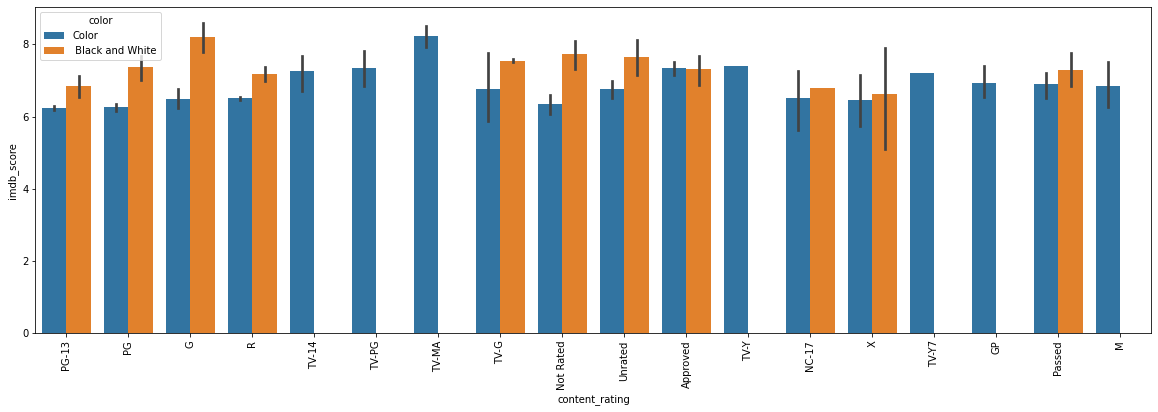

In [21]:
plt.figure(figsize=(20, 6))
sns.barplot(x='content_rating',y='imdb_score',hue='color',data=data);
plt.xticks(rotation=90)
plt.show()

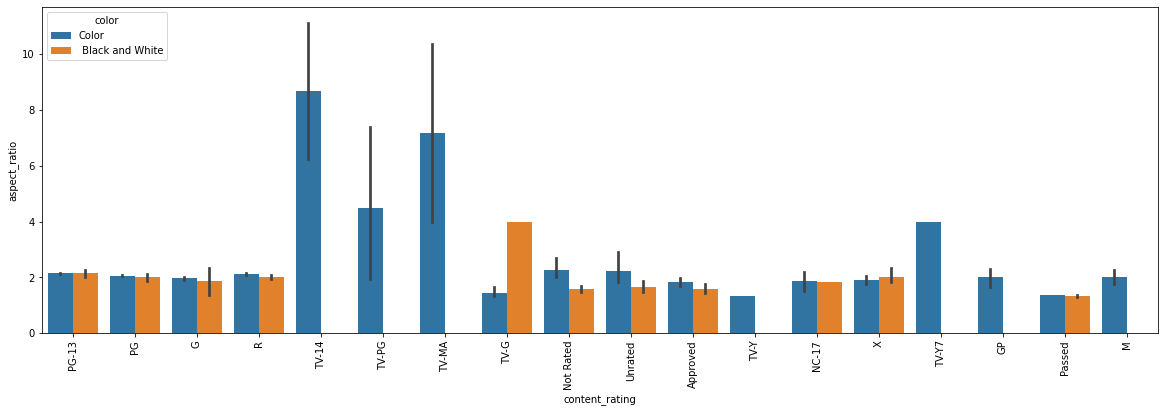

In [22]:
plt.figure(figsize=(20, 6))
sns.barplot(x='content_rating',y='aspect_ratio',hue='color',data=data);
plt.xticks(rotation=90)
plt.show()

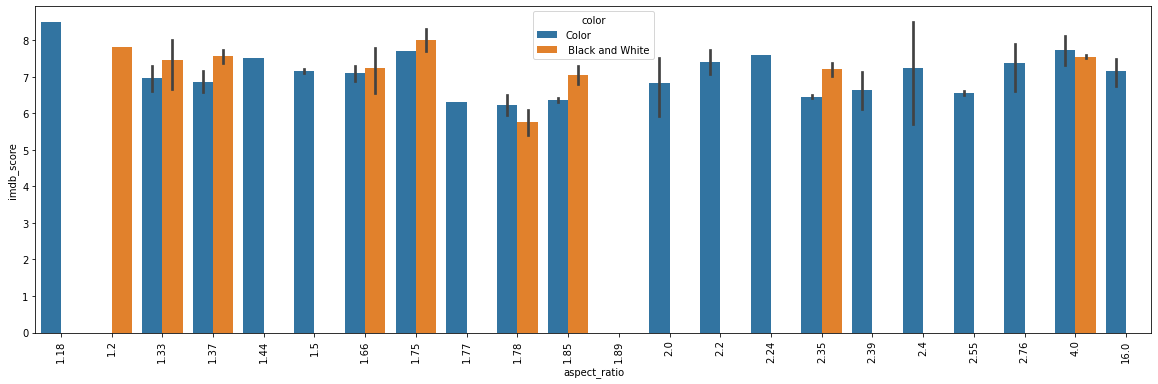

In [23]:
plt.figure(figsize=(20, 6))
sns.barplot(x='aspect_ratio',y='imdb_score',hue='color',data=data);
plt.xticks(rotation=90)
plt.show()

In [24]:
data.isna().sum()

color                         19
director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews          21
language                      12
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
dtype: int64

In [25]:
# Removing null values 
data = data.dropna()

In [26]:
data.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000


In [27]:
columns = ['movie_imdb_link','color','movie_title','facenumber_in_poster', 'plot_keywords', 'actor_3_name','movie_imdb_link','aspect_ratio','language']
data.drop(columns= columns, inplace= True)

In [28]:
data.head()

,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,num_voted_users,cast_total_facebook_likes,num_user_for_reviews,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,movie_facebook_likes
0,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,886204,4834,3054.0,USA,PG-13,237000000.0,2009.0,936.0,7.9,33000
1,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,471220,48350,1238.0,USA,PG-13,300000000.0,2007.0,5000.0,7.1,0
2,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,275868,11700,994.0,UK,PG-13,245000000.0,2015.0,393.0,6.8,85000
3,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,1144337,106759,2701.0,USA,PG-13,250000000.0,2012.0,23000.0,8.5,164000
5,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,212204,1873,738.0,USA,PG-13,263700000.0,2012.0,632.0,6.6,24000


In [29]:
data.shape
# The number of columns have now been reduced to 20 

(3756, 20)

## Label Encoding Categorical data

In [30]:
le=LabelEncoder()
for i in data.select_dtypes(object).columns.values:
    data[i]=le.fit_transform(data[i])
data.dtypes

director_name                  int32
num_critic_for_reviews       float64
duration                     float64
director_facebook_likes      float64
actor_3_facebook_likes       float64
actor_2_name                   int32
actor_1_facebook_likes       float64
gross                        float64
genres                         int32
actor_1_name                   int32
num_voted_users                int64
cast_total_facebook_likes      int64
num_user_for_reviews         float64
country                        int32
content_rating                 int32
budget                       float64
title_year                   float64
actor_2_facebook_likes       float64
imdb_score                   float64
movie_facebook_likes           int64
dtype: object

# Distribution Plot

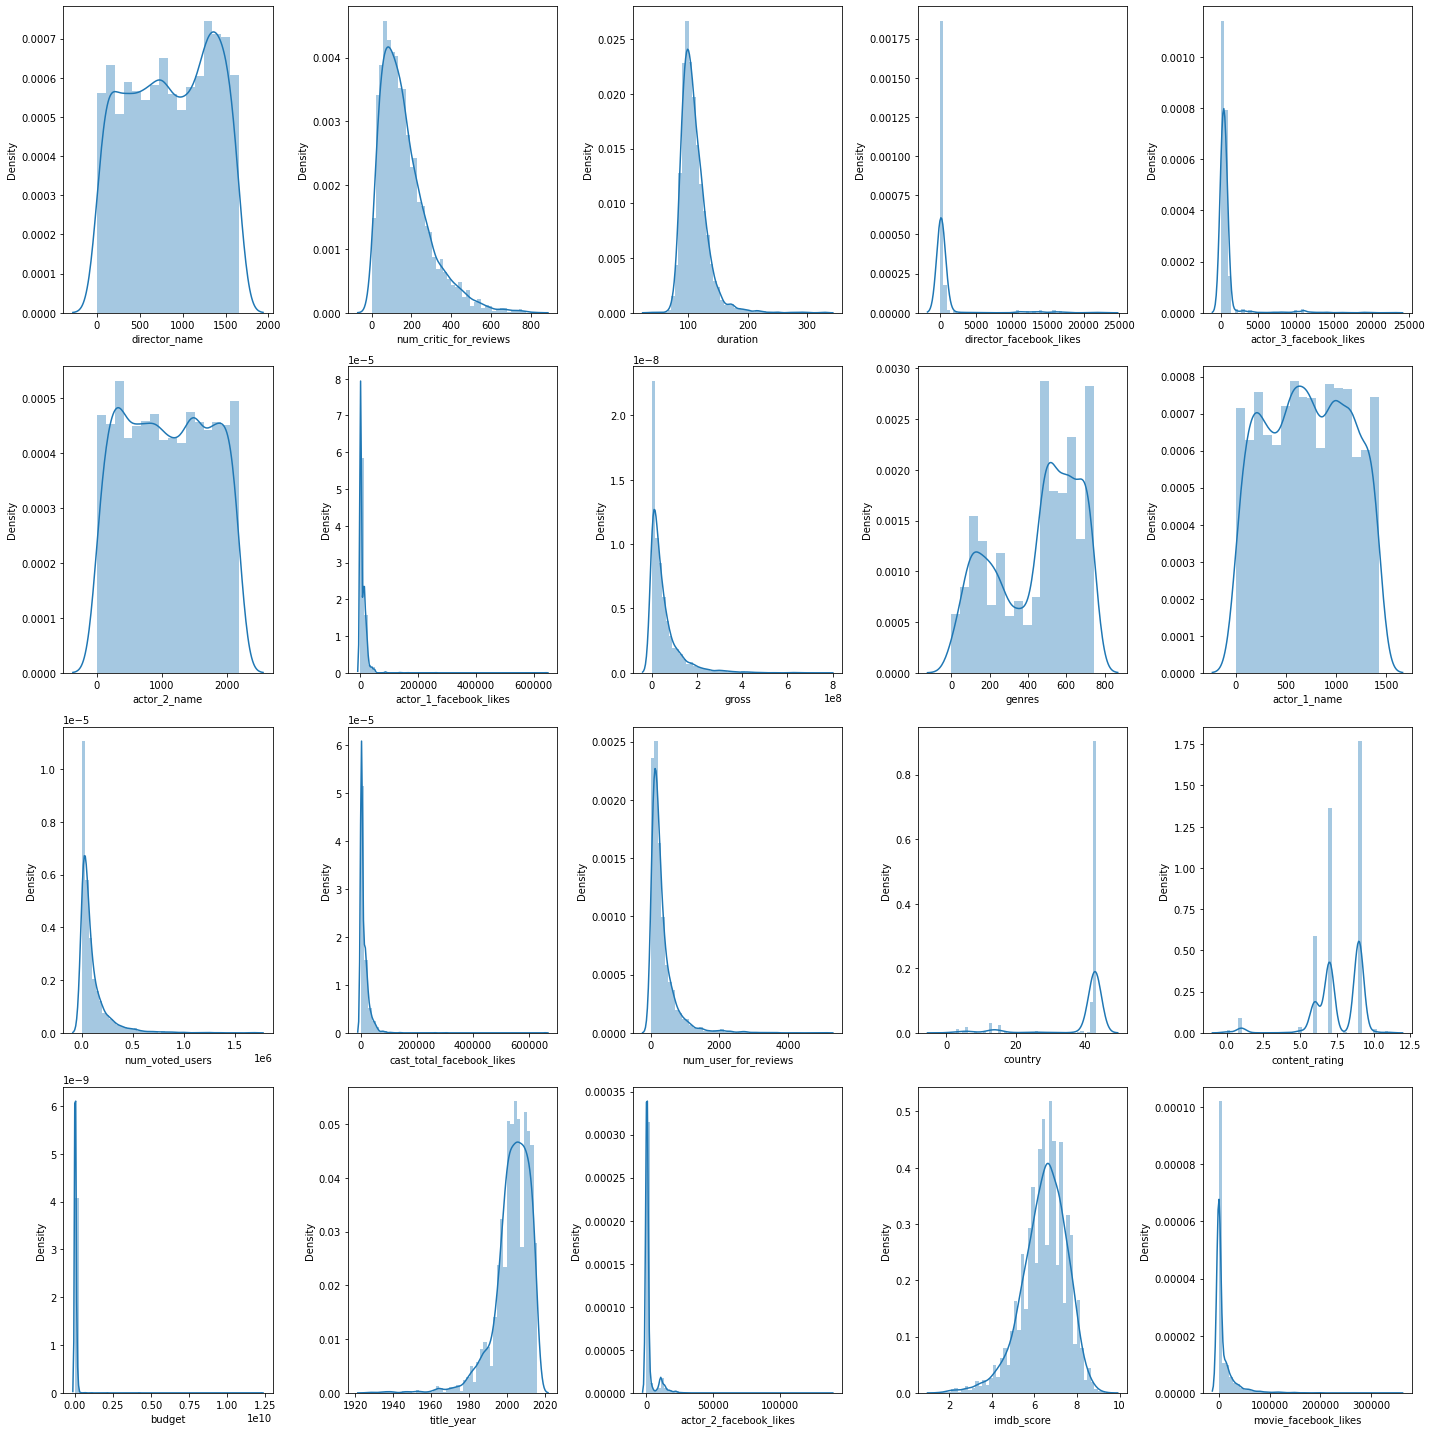

In [31]:
rows=4
cols=5
fig, ax=plt.subplots(nrows=rows,ncols=cols,figsize=(20,20))
col=data.columns
index=0
for i in range(rows):
    for j in range(cols):
        sns.distplot(data[col[index]],ax=ax[i][j])
        index=index+1
plt.tight_layout()

# Log Transformation 

In [32]:
data.columns                       

Index(['director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'num_voted_users', 'cast_total_facebook_likes', 'num_user_for_reviews',
       'country', 'content_rating', 'budget', 'title_year',
       'actor_2_facebook_likes', 'imdb_score', 'movie_facebook_likes'],
      dtype='object')

In [33]:
skewed_features=['director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'num_voted_users', 'cast_total_facebook_likes', 'num_user_for_reviews',
       'country', 'content_rating', 'budget', 'title_year',
       'actor_2_facebook_likes', 'imdb_score', 'movie_facebook_likes']

In [34]:
for i in skewed_features:
    data[i]=np.log(data[i]+1)

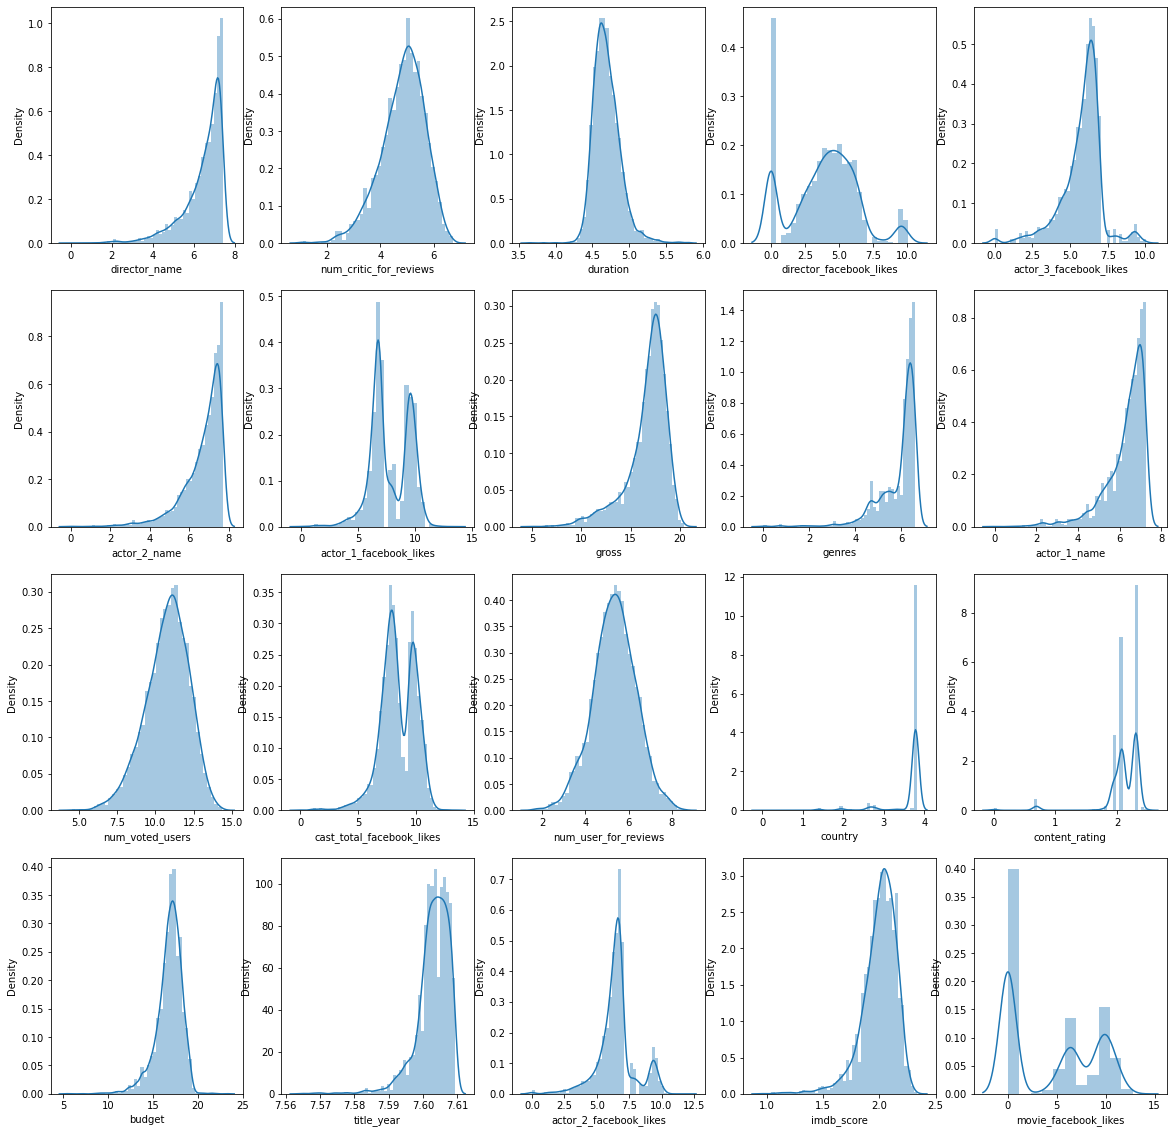

In [35]:
rows=4
cols=5
fig, ax=plt.subplots(nrows=rows,ncols=cols,figsize=(20,20))
col=data.columns
index=0
for i in range(rows):
    for j in range(cols):
        sns.distplot(data[col[index]],ax=ax[i][j])
        index=index+1
plt.show()

## Splitting dataset

In [36]:
X_train,X_test,Y_train,Y_test=train_test_split(data.drop(columns = ['imdb_score']),data['imdb_score'],test_size=0.2,random_state=40)
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(3004, 19) (752, 19) (3004,) (752,)


# Machine Learning

### Linear Regression

In [37]:
model = LinearRegression().fit(X_train,Y_train)

In [38]:
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)
RMSE_test = np.sqrt(mean_squared_error(Y_test, test_pred))
RMSE_train= np.sqrt(mean_squared_error(Y_train,train_pred))

In [39]:
print("RMSE TrainingData = ",str(RMSE_train))
print("RMSE TestData = ",str(RMSE_test))
print('-'*50)
print('RSquared value on train:',model.score(X_train, Y_train))
print('RSquared value on test:',model.score(X_test, Y_test))

RMSE TrainingData =  0.12041595568987457
RMSE TestData =  0.1186110530757111
--------------------------------------------------
RSquared value on train: 0.4080095055085241
RSquared value on test: 0.40210015522318965


### Decision Tree Regressor

In [40]:
model=DecisionTreeRegressor(max_depth=9).fit(X_train,Y_train)

In [41]:
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)
RMSE_test = np.sqrt(mean_squared_error(Y_test, test_pred))
RMSE_train= np.sqrt(mean_squared_error(Y_train,train_pred))

In [42]:
print("RMSE TrainingData = ",str(RMSE_train))
print("RMSE TestData = ",str(RMSE_test))
print('-'*50)
print('RSquared value on train:',model.score(X_train, Y_train))
print('RSquared value on test:',model.score(X_test, Y_test))

RMSE TrainingData =  0.08302711763715252
RMSE TestData =  0.1198093906613355
--------------------------------------------------
RSquared value on train: 0.7185595074222233
RSquared value on test: 0.38995785993754006


### Random Forest Regressor

In [43]:
model = RandomForestRegressor().fit(X_train,Y_train)

In [44]:
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)
RMSE_test = np.sqrt(mean_squared_error(Y_test, test_pred))
RMSE_train= np.sqrt(mean_squared_error(Y_train,train_pred))

In [45]:
print("RMSE TrainingData = ",str(RMSE_train))
print("RMSE TestData = ",str(RMSE_test))
print('-'*50)
print('RSquared value on train:',model.score(X_train, Y_train))
print('RSquared value on test:',model.score(X_test, Y_test))

RMSE TrainingData =  0.04133992689825508
RMSE TestData =  0.09947357781792644
--------------------------------------------------
RSquared value on train: 0.9302272133846996
RSquared value on test: 0.5794732811813461


### K-Nearest Neighbours

In [46]:
model = KNeighborsRegressor().fit(X_train,Y_train)

In [47]:
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)
RMSE_test = np.sqrt(mean_squared_error(Y_test, test_pred))
RMSE_train= np.sqrt(mean_squared_error(Y_train,train_pred))

In [48]:
print("RMSE TrainingData = ",str(RMSE_train))
print("RMSE TestData = ",str(RMSE_test))
print('-'*50)
print('RSquared value on train:',model.score(X_train, Y_train))
print('RSquared value on test:',model.score(X_test, Y_test))

RMSE TrainingData =  0.10856954037953365
RMSE TestData =  0.13173731630991498
--------------------------------------------------
RSquared value on train: 0.518758958219276
RSquared value on test: 0.2624427420400328


### XGBoost Regressor

In [49]:
model =xgb.XGBRegressor().fit(X_train, Y_train)

In [50]:
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)
RMSE_test = np.sqrt(mean_squared_error(Y_test, test_pred))
RMSE_train= np.sqrt(mean_squared_error(Y_train,train_pred))

In [51]:
print("RMSE TrainingData = ",str(RMSE_train))
print("RMSE TestData = ",str(RMSE_test))
print('-'*50)
print('RSquared value on train:',model.score(X_train, Y_train))
print('RSquared value on test:',model.score(X_test, Y_test))

RMSE TrainingData =  0.016453210384851504
RMSE TestData =  0.09549969503973747
--------------------------------------------------
RSquared value on train: 0.9889478196861716
RSquared value on test: 0.612401500913349
